In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Point definition

In [ ]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

Distance

In [ ]:
def dist(p1, p2):
  return np.sqrt((p1.x-p2.x)**2+(p1.y-p2.y)**2)

Get Random points

In [ ]:
def random_points(n):
  points = []
  for i in range(n):
    points.append(Point(np.random.randint(0,120), np.random.randint(0,120)))
  return points

Get centroids init

In [ ]:
def get_centroids_init(points, k):
  x = np.mean(list(map(lambda point: point.x, points)))
  y = np.mean(list(map(lambda point: point.y, points)))
  R = 0
  for p in points:
    R = max(R, dist(p, Point(x, y)))
  
  centroids = []
  for i in range(k):
    centroids.append(Point(
        x + R*np.cos(2*np.pi*i/k), 
        y + R*np.sin(2*np.pi*i/k)))
  return centroids

Get centroids

In [ ]:
def get_centroid(points):
  x = np.mean(list(map(lambda point: point.x, points)))
  y = np.mean(list(map(lambda point: point.y, points)))
  return Point(x, y)

Get probabilities

In [ ]:
def get_probabilities(points, centroids, m):
  matrix = [[]]
  for i in range(len(points)):
    if (i != 0):
      matrix.append([])
    for j in range(len(centroids)):
      matrix[i].append(0)

  for i in range(len(points)):
    sum = 0

    for j in range(len(centroids)):
      matrix[i][j] = dist(points[i], centroids[j])**(2/(1-m))
      sum = sum + matrix[i][j]

    for j in range(len(centroids)):
    
      matrix[i][j] = matrix[i][j]/sum

  return matrix

Get clustering

In [ ]:
def get_clustering(probabilities, points, cluster_count):
  clustering = []
  for i in range(cluster_count):
    clustering.append([])

  for pointPropIndex in range(len(probabilities)):
    index = probabilities[pointPropIndex].index(max(probabilities[pointPropIndex]))
    clustering[index].append(points[pointPropIndex])
  
  return clustering

Show results

In [ ]:
def show_results(clustering, centroids):
  colors = ['magenta', 'blue', 'green', 'cyan', 'red', 'gold', 'peru', 'purple', 'orange', 'pink']
  for cluster in clustering:
    plt.scatter(list(map(lambda point: point.x, cluster)),
            list(map(lambda point: point.y, cluster)),
            color=colors[clustering.index(cluster)])
    
  plt.scatter(list(map(lambda point: point.x, centroids)),
            list(map(lambda point: point.y, centroids)),
            color='black')
  plt.show()

Main

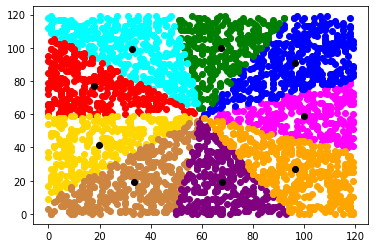

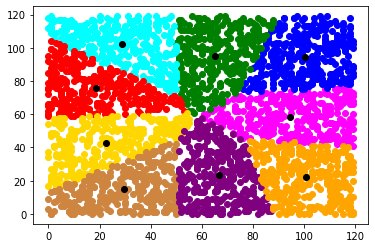

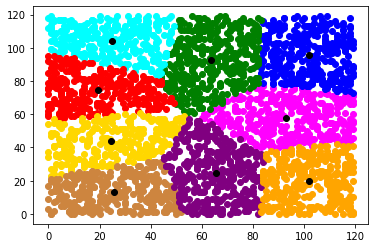

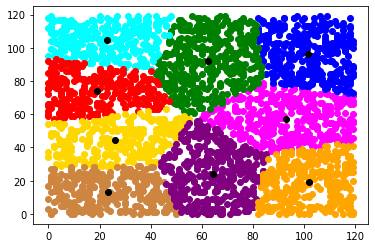

In [ ]:
if __name__ == "__main__":
  n = 3000
  m = 2
  cluster_count = 9

points = random_points(n)
centroids = get_centroids_init(points, cluster_count)

for i in range(4):
  probabilities = get_probabilities(points, centroids, m)
  clustering = get_clustering(probabilities, points, cluster_count)

  centroids = []
  for cluster in clustering:
    centroids.append(get_centroid(cluster))
  
  show_results(clustering, centroids)
